## Task 2 - Prediction of store sales

#### Import important liberaries

In [1]:
import os
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Get the current working directory
current_dir = os.getcwd()

# Append the parent directory to sys.path
parent_dir = os.path.dirname(current_dir)
sys.path.append(parent_dir)

# ignore warrnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
from scripts.Data_preprocessing_pipeline import DataPreprocessingPipeline

In [3]:
# Data loading our data is in CSV format
train_df = pd.read_csv('../data/train.csv')
test_df = pd.read_csv('../data/test.csv')
store_df = pd.read_csv('../data/store.csv')

In [4]:
pipeline = DataPreprocessingPipeline(train_df, test_df, store_df)

In [5]:
# Run the entire preprocessing pipeline
processed_train_df, processed_test_df = pipeline.run_pipeline(
    missing_num_strategy='mean',
    missing_cat_strategy='mode',
    outlier_method='zscore'
)

In [6]:
processed_test_df.head(2)

,Id,Store,DayOfWeek,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,...,IsWeekend,Day,Month,Year,IsHoliday,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c
0,1,1,4,1.0,1,0,1270.0,9.0,2008.0,0,...,0,17,9,2015,0,0,1,0,0,0
1,2,3,4,1.0,1,0,14130.0,12.0,2006.0,1,...,0,17,9,2015,0,0,0,0,0,0


In [7]:
processed_test_df.columns

Index(['Id', 'Store', 'DayOfWeek', 'Open', 'Promo', 'SchoolHoliday',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Weekday', 'IsWeekend', 'Day',
       'Month', 'Year', 'IsHoliday', 'StoreType_b', 'StoreType_c',
       'StoreType_d', 'Assortment_b', 'Assortment_c'],
      dtype='object')

In [8]:
processed_train_df.columns

Index(['Store', 'DayOfWeek', 'Sales', 'Open', 'Promo', 'SchoolHoliday',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Weekday', 'IsWeekend', 'Day',
       'Month', 'Year', 'IsHoliday', 'StoreType_b', 'StoreType_c',
       'StoreType_d', 'Assortment_b', 'Assortment_c'],
      dtype='object')

In [9]:
processed_train_df

,Store,DayOfWeek,Sales,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,...,IsWeekend,Day,Month,Year,IsHoliday,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c
0,1,5,5263,1,1,1,1270.0,9.000000,2008.000000,0,...,0,31,7,2015,0,0,1,0,0,0
1,2,5,6064,1,1,1,570.0,11.000000,2007.000000,1,...,0,31,7,2015,0,0,0,0,0,0
2,3,5,8314,1,1,1,14130.0,12.000000,2006.000000,1,...,0,31,7,2015,0,0,0,0,0,0
3,4,5,13995,1,1,1,620.0,9.000000,2009.000000,0,...,0,31,7,2015,0,0,1,0,0,1
4,5,5,4822,1,1,1,29910.0,4.000000,2015.000000,0,...,0,31,7,2015,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,0,0,0,1,1900.0,6.000000,2014.000000,1,...,0,1,1,2013,1,0,0,0,0,0
1017205,1112,2,0,0,0,1,1880.0,4.000000,2006.000000,0,...,0,1,1,2013,1,0,1,0,0,1
1017206,1113,2,0,0,0,1,9260.0,7.222866,2008.690228,0,...,0,1,1,2013,1,0,0,0,0,1
1017207,1114,2,0,0,0,1,870.0,7.222866,2008.690228,0,...,0,1,1,2013,1,0,0,0,0,1


### Building models with sklearn pipelines

#### Instantiate the Model Builder

In [10]:
from scripts.random_forest_pipeline_model import ModelBuilder
# Build Random Forest Model
model_builder = ModelBuilder(processed_train_df)

# Build the Model: Run the model building process.
rf_model, mse, rmse, mae, r2 = model_builder.build_random_forest()

2025-01-13 23:41:54.903010: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-13 23:41:54.903541: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-13 23:41:54.906469: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-13 23:41:54.914453: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1736800914.924923    6742 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1736800914.92

Mean Squared Error (MSE): 751307.1701509975
Root Mean Squared Error (RMSE): 866.7797702709711
Mean Absolute Error (MAE): 499.5788586427582
R-Squared (R2): 0.9491975437745328


In [11]:
processed_test_df=processed_test_df[['Id','Store', 'DayOfWeek', 'Open', 'Promo', 'SchoolHoliday',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Weekday', 'IsWeekend', 'Day',
       'Month', 'Year', 'IsHoliday', 'StoreType_b', 'StoreType_c',
       'StoreType_d', 'Assortment_b', 'Assortment_c']]

### Post Prediction Analysis
#### Explore the feature importance from our modeling.

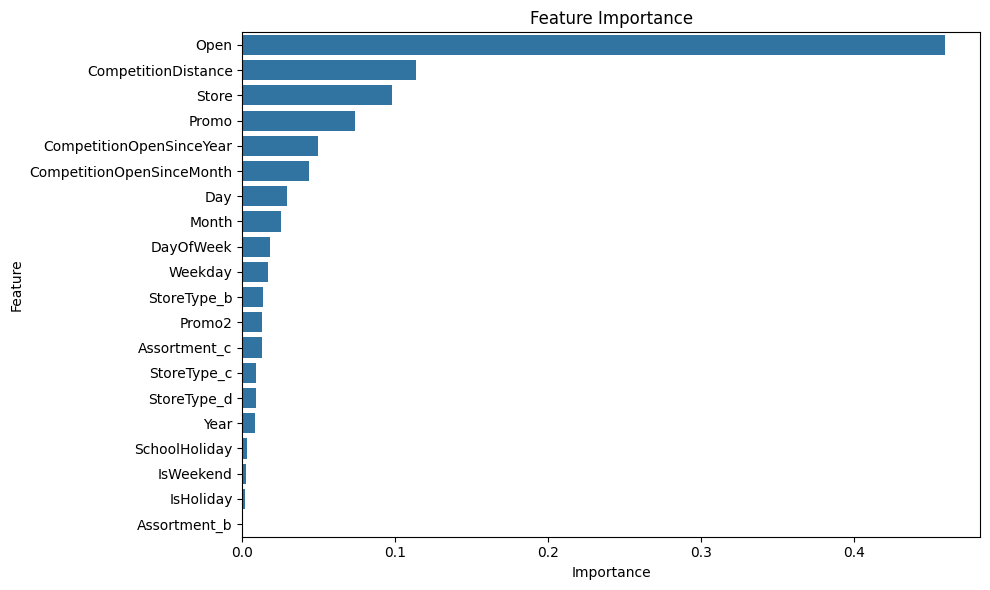

                      Feature  Importance
2                        Open    0.459673
5         CompetitionDistance    0.113439
0                       Store    0.097585
3                       Promo    0.073474
7    CompetitionOpenSinceYear    0.049162
6   CompetitionOpenSinceMonth    0.043354
11                        Day    0.028987
12                      Month    0.025542
1                   DayOfWeek    0.018200
9                     Weekday    0.016684
15                StoreType_b    0.013726
8                      Promo2    0.013022
19               Assortment_c    0.012757
16                StoreType_c    0.008999
17                StoreType_d    0.008926
13                       Year    0.008524
4               SchoolHoliday    0.003251
10                  IsWeekend    0.002644
14                  IsHoliday    0.001564
18               Assortment_b    0.000487


In [12]:
# Check Feature Importance: Get the feature importances.
importance_df = model_builder.feature_importance(plot=True)
print(importance_df)

### Serialize the Model: Save the trained model to a `pickle` file.

To serve the models you built above, you need to serialize them. Save the model with the timestamp(eg. 10-08-2020-16-32-31-00.pkl). This is necessary so that you can track predictions from various models.

In [13]:
model_filename = model_builder.serialize_model()

Model saved as random_forest_model-13-01-2025-23-45-22.pkl


### Make sales predictions

In [ ]:
# load model
import joblib
model =joblib.load('../model/random_forest_model-12-01-2025-21-38-58.pkl')
# Make predictions
predictions = model.predict(processed_test_df.drop(columns='Id'))

In [14]:
# Create a DataFrame with Id and predictions
results_df = pd.DataFrame({
    'Id': processed_test_df['Id'],
    'Prediction': predictions
})
results_df

,Id,Prediction
0,1,4496.54
1,2,7615.40
2,3,9743.66
3,4,8459.36
4,5,7866.18
...,...,...
41083,41084,3048.96
41084,41085,7960.68
41085,41086,6389.90
41086,41087,24978.74


# Building model with deep learning

#### LSTM model building

In [ ]:
from scripts.deep_learning_model import LSTMModelBuilder

In [ ]:
train_df['Date'] = pd.to_datetime(train_df['Date'])
train_df = train_df[['Date', 'Sales']]
train_df = train_df.set_index('Date')

In [ ]:
# Initialize the LSTM model class
lstm_model = LSTMModelBuilder(train_df)

In [ ]:
 # Step 1: Check for stationarity
lstm_model.check_stationarity()